### Tarea Práctica - INFO257 Unidad 1
#### Fabián Catalán Vejar


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

df = pd.read_csv("SDSS-DR14.csv")
df[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


Cambiamos de posición la columna **class** al final para un mejor manejo y convertimos sus datos a variables dummy

In [2]:
# df.isnull().sum() # no hay nulos
# df.info() # 10000 valores no nulos.
cl = df['class']
clase = pd.get_dummies(cl)
df = df.drop( ['class'] ,1)
#df = pd.concat([df,clase],axis=1)
#df.head()

Veremos cuánto peso tiene cada resultado.

In [3]:
print('GALAXY suma: ' + str(np.sum(clase['GALAXY'])))
print('QSO suma: ' + str(np.sum(clase['QSO'])))
print('STAR suma: ' + str(np.sum(clase['STAR'])))

GALAXY suma: 4998
QSO suma: 850
STAR suma: 4152


Se hará una estrategia: Si class es **GALAXY = 1**, **QSO = 2**, **STAR = 3**

In [4]:
cl = cl.apply(lambda x: {
        'GALAXY': 1,
        'QSO': 2,
        'STAR': 3
    }[x])
cl.head()

0    3
1    3
2    1
3    3
4    3
Name: class, dtype: int64

In [5]:
#Concatenamos al dataframe 
df = pd.concat([df, cl],1)
df[:10]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,3
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,3
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,1
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,3
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,3
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,0.000315,324,51666,594,3
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,0.100242,287,52023,559,1
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,0.000315,3306,54922,515,3
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,0.000089,323,51615,595,3
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,0.040508,288,52000,400,1


### Limpieza de datos y balanceo

Se limpiará los datos, para ello buscaremos columnas con datos constantes. Posteriormente se eliminarán las columnas con datos no únicos

In [6]:
df.columns[df.nunique() <= 1]

Index(['objid', 'rerun'], dtype='object')

In [7]:
df = df.drop(['objid', 'rerun'],1)
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491,3
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541,3
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510,3
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512,3


Ahora usaremos iloc para ver el balanceo de los datos

In [8]:
df.iloc[0]

ra           1.835313e+02
dec          8.969303e-02
u            1.947406e+01
g            1.704240e+01
r            1.594699e+01
i            1.550342e+01
z            1.522531e+01
run          7.520000e+02
camcol       4.000000e+00
field        2.670000e+02
specobjid    3.722360e+18
redshift    -8.960000e-06
plate        3.306000e+03
mjd          5.492200e+04
fiberid      4.910000e+02
class        3.000000e+00
Name: 0, dtype: float64

Se empleará en primera instancia una relación entre variables, Notamos que podría existir desbalance en los datos. 

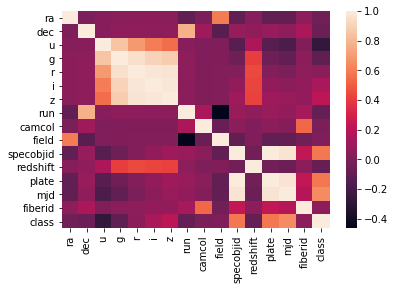

In [9]:
sb.heatmap(df.corr())

In [10]:
c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")
#so[:-20]

res = np.argwhere(np.triu(df.corr().values <-0.2))
res


array([[ 2, 15],
       [ 7,  9]])

Notamos que existen variables con correlación negativa(**run, specobjid**), por lo tanto eliminaremos: **run** . Se ploteará una segunda vez

In [11]:
df_corr = df
df_corr = df_corr.drop(['run'],1)

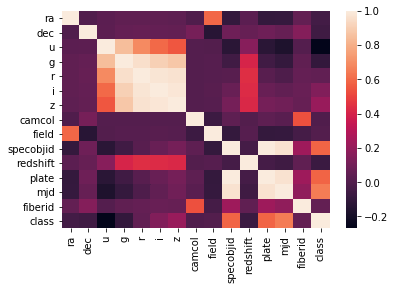

In [12]:
sb.heatmap(df_corr.corr())

Notamos que después de eliminar las variables, se nos originan mas correlaciones negativas. Se empleará una estrategia: guardar este dataframe como df_corr1 y crear uno nuevo a sin las correlaciones negativas como df_corr2

In [13]:
#df_corr2 = df_corr1.drop(['u','g','ra', 'field', 'objid'],1)
#sb.heatmap(df_corr2.corr())

In [14]:
#df_corr2.head()

### OJO!
Vemos que la correlación empeora!, entonces vamos a trabajar con el dataframe con las clases cambiadas(df) y con df_corr1.

Partimos con df

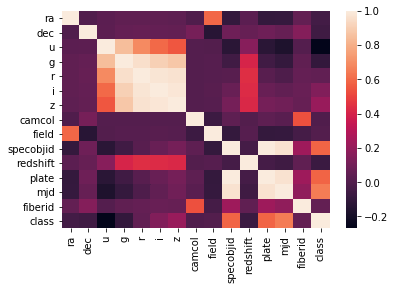

In [15]:
sb.heatmap(df_corr.corr())

Se definen variables dependientes X que corresponden a los datos de las columnas 1 a 16 y la última corresponde a la variable independiente.

In [16]:
df_corr

,ra,dec,u,g,r,i,z,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,4,267,3.722360e+18,-0.000009,3306,54922,491,3
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,4,267,3.638140e+17,-0.000055,323,51615,541,3
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,4,268,3.232740e+17,0.123111,287,52023,513,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,4,269,3.722370e+18,-0.000111,3306,54922,510,3
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,4,269,3.722370e+18,0.000590,3306,54922,512,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,3,161,5.033450e+17,0.027583,447,51877,246,1
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,3,162,5.033400e+17,0.117772,447,51877,228,1
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,3,162,8.222620e+18,-0.000402,7303,57013,622,3
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,3,163,5.033400e+17,0.014019,447,51877,229,1


In [18]:
X = df_corr.iloc[:,0:14].values
y = df_corr.iloc[:,14].values
df_corr.iloc[:,0:14]

,ra,dec,u,g,r,i,z,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,3,161,5.033450e+17,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,3,162,5.033400e+17,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,3,163,5.033400e+17,0.014019,447,51877,229


#### Particionamos los datos (70% entrenamiento y 30% testeo)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)


## Aplicación de Modelos de Aprendizaje

### Aplicamos Regresión Logística

In [20]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

coeficientes del modelo: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
intercept: [0. 0. 0.]


In [22]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1453,    0,    0],
       [ 247,    0,    0],
       [1300,    0,    0]])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      1.00      0.65      1453
           2       0.00      0.00      0.00       247
           3       0.00      0.00      0.00      1300

    accuracy                           0.48      3000
   macro avg       0.16      0.33      0.22      3000
weighted avg       0.23      0.48      0.32      3000

